# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here.
import pandas as pd

student_data=pd.DataFrame({"Age":[17,51,27,21,36,48,19,26,54,30], "Tardies":[10,1,5,9,4,2,9,6,0,3]})
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

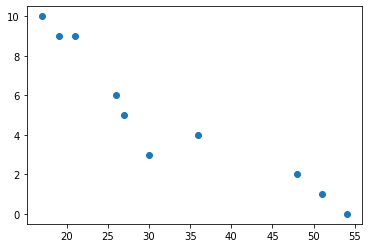

In [5]:
# Your code here.
import matplotlib.pyplot as plt 
plt.scatter(student_data["Age"],student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [6]:
# Your response here.

"""
It looks like it could be some negative realtionship between the age and the late that the student arrive.
The younger, the bigger the late. 
More older, the tardie is less.  
"""

'\nIt looks like it could be some negative realtionship between the age and the late that the student arrive.\nThe younger, the bigger the late. \nMore older, the tardie is less.  \n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.
#correlation:
import scipy.stats
import numpy as np
print(scipy.stats.pearsonr(student_data["Age"], student_data["Tardies"]))
print(scipy.stats.spearmanr(student_data["Age"], student_data["Tardies"]))
print(scipy.stats.kendalltau(student_data["Age"], student_data["Tardies"]))

#covariance:
covMatrix = np.cov(student_data,bias=True)
print (covMatrix)


(-0.939162688688712, 5.566653834553479e-05)
SpearmanrResult(correlation=-0.9848069807617047, pvalue=2.2888344854823716e-07)
KendalltauResult(correlation=-0.9438798074485389, pvalue=0.00016213175204392636)
[[ 12.25  87.5   38.5   21.    56.    80.5   17.5   35.    94.5   47.25]
 [ 87.5  625.   275.   150.   400.   575.   125.   250.   675.   337.5 ]
 [ 38.5  275.   121.    66.   176.   253.    55.   110.   297.   148.5 ]
 [ 21.   150.    66.    36.    96.   138.    30.    60.   162.    81.  ]
 [ 56.   400.   176.    96.   256.   368.    80.   160.   432.   216.  ]
 [ 80.5  575.   253.   138.   368.   529.   115.   230.   621.   310.5 ]
 [ 17.5  125.    55.    30.    80.   115.    25.    50.   135.    67.5 ]
 [ 35.   250.   110.    60.   160.   230.    50.   100.   270.   135.  ]
 [ 94.5  675.   297.   162.   432.   621.   135.   270.   729.   364.5 ]
 [ 47.25 337.5  148.5   81.   216.   310.5   67.5  135.   364.5  182.25]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here.
import statsmodels.api as sm
x = student_data['Age']
y = student_data['Tardies']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()


"""
The model I am bulding is the following:

Tardies=b0+b1Age

It can be said that as it was expected there is a negative realtionship between the age and the late that student arrive.
In fact, every year more has the student, ceteris paribus, it is estimated to arrive 0.248 minutes late.

The R2 is big for the simple model I had (just one variable)

"""

C:\Users\Portu\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


'\nThe model I am bulding is the following:\n\nTardies=b0+b1Age\n\nIt can be said that as it was expected there is a negative realtionship between the age and the late that student arrive.\nIn fact, every year more has the student, ceteris paribus, it is estimated to arrive 0.248 minutes late.\n\nThe R2 is big for the simple model I had (just one variable)\n\n'

Plot your regression model on your scatter plot.

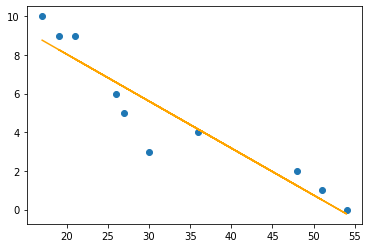

In [55]:
# Your code here.
from scipy import stats
x = student_data['Age']
y = student_data['Tardies']
results = stats.linregress(x,y)
results
regression_line = results.slope*x + results.intercept
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
# Import any libraries you may need & the data
vehicle=pd.read_csv("vehicles.csv")
vehicle.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
# Your response here. 
vehi=vehicle[["Year","Cylinders","Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
vehi.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [ ]:
#Strong correlation: cylinder-fuel barrels/year, cylinder-Duel cost/year, fuel barrels/year-fuel cost/year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [36]:
# Your response here.

import statsmodels.api as sm
x = vehicle[["Cylinders", "Fuel Barrels/Year","Fuel Cost/Year"]]
y = vehicle['CO2 Emission Grams/Mile']
X = sm.add_constant(x)

model = sm.OLS(y,X).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [37]:
# Your response here. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.977
Model:                                 OLS   Adj. R-squared:                  0.977
Method:                      Least Squares   F-statistic:                 5.160e+05
Date:                     Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                             22:50:10   Log-Likelihood:            -1.5480e+05
No. Observations:                    35952   AIC:                         3.096e+05
Df Residuals:                        35948   BIC:                         3.096e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.4862      0.388     24.428      0.000       8.725      10.247
Cylinders             1.0394      0.086     12.045      0.000       0.870       1.208
Fuel Barrels/Year    22.0626      0.053    415.138      0.000      21.958      22.167
Fuel Cost/Year        0.0377      0.001     75.098      0.000       0.037       0.039
==============================================================================
Omnibus:                    78457.218   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        446448610.343
Skew:                          19.940   Prob(JB):                         0.00
Kurtosis:                     547.462   Cond. No.                     8.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [45]:
# Your code here.
party=pd.DataFrame({"x":[1,3,4,6,8,9,11,14],"y":[1,2,4,4,5,7,8,13]})
party

,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

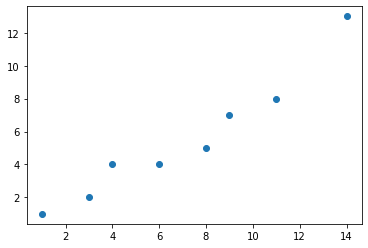

In [58]:
# Your code here.
plt.scatter(party["x"],party["y"])
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
#Looks like the guy is righy and there is a positive relationship between variables.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [61]:
# Your response here. 

q1=party.quantile(0.25)
q3=party.quantile(0.75)
dif=q1-q3

outlier=(party<(q1-1.5*dif))|(party>(q3+1.5*dif))
outlier

,x,y
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
